# **EDA (Exploratory Data Analysis)**

In [ ]:
# Install the Kaggle library
!pip install kaggle

# Assuming you have uploaded the 'kaggle.json' file to the current directory:
# Move the kaggle.json file into the appropriate location
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
S
# Give appropriate permissions to the token to avoid a warning on Kaggle tool startup
!chmod 600 ~/.kaggle/kaggle.json

# Use Kaggle API to download the UCF50 dataset
!kaggle datasets download -d vineethakkinapalli/ucf50-action-recognition-dataset

100% 3.04G/3.04G [02:19<00:00, 22.3MB/s]
100% 3.04G/3.04G [02:19<00:00, 23.3MB/s]


In [ ]:
!unzip ucf50-action-recognition-dataset.zip -d /content/ucf50

Streaming output truncated to the last 5000 lines.
  inflating: /content/ucf50/UCF50/HorseRace/v_HorseRace_g08_c02.avi  
  inflating: /content/ucf50/UCF50/HorseRace/v_HorseRace_g08_c03.avi  
  inflating: /content/ucf50/UCF50/HorseRace/v_HorseRace_g08_c04.avi  
  inflating: /content/ucf50/UCF50/HorseRace/v_HorseRace_g08_c07.avi  
  inflating: /content/ucf50/UCF50/HorseRace/v_HorseRace_g09_c01.avi  
  inflating: /content/ucf50/UCF50/HorseRace/v_HorseRace_g09_c02.avi  
  inflating: /content/ucf50/UCF50/HorseRace/v_HorseRace_g09_c03.avi  
  inflating: /content/ucf50/UCF50/HorseRace/v_HorseRace_g09_c04.avi  
  inflating: /content/ucf50/UCF50/HorseRace/v_HorseRace_g10_c01.avi  
  inflating: /content/ucf50/UCF50/HorseRace/v_HorseRace_g10_c02.avi  
  inflating: /content/ucf50/UCF50/HorseRace/v_HorseRace_g10_c03.avi  
  inflating: /content/ucf50/UCF50/HorseRace/v_HorseRace_g10_c04.avi  
  inflating: /content/ucf50/UCF50/HorseRace/v_HorseRace_g11_c01.avi  
  inflating: /content/ucf50/UCF50/Horse

## **Data Understanding**

In [ ]:
# Dive into the UCF50 directory to list its subdirectories (categories)
base_directory = '/content/ucf50/UCF50'
categories = os.listdir(base_directory)

print(f"Total number of categories: {len(categories)}")
print(f"Sample categories: {categories[:5]}")  # Print the first 5 categories as a sample

# Checking the number of videos in each category
video_counts = {category: len(os.listdir(os.path.join(base_directory, category))) for category in categories}
print(video_counts)


Total number of categories: 50
Sample categories: ['Skiing', 'SoccerJuggling', 'SkateBoarding', 'Fencing', 'Rowing']
{'Skiing': 144, 'SoccerJuggling': 156, 'SkateBoarding': 120, 'Fencing': 111, 'Rowing': 137, 'Drumming': 161, 'JavelinThrow': 117, 'HulaHoop': 125, 'TrampolineJumping': 119, 'JugglingBalls': 122, 'Punch': 160, 'HighJump': 123, 'Basketball': 137, 'JumpingJack': 123, 'Lunges': 141, 'VolleyballSpiking': 116, 'MilitaryParade': 127, 'BaseballPitch': 150, 'RopeClimbing': 130, 'RockClimbingIndoor': 148, 'PlayingGuitar': 160, 'GolfSwing': 142, 'PlayingPiano': 105, 'PoleVault': 160, 'SalsaSpin': 133, 'PlayingTabla': 124, 'Swing': 137, 'PlayingViolin': 100, 'HorseRace': 127, 'HorseRiding': 197, 'Mixing': 141, 'JumpRope': 148, 'WalkingWithDog': 123, 'PushUps': 106, 'Kayaking': 157, 'Biking': 145, 'PizzaTossing': 114, 'Nunchucks': 150, 'PommelHorse': 123, 'BreastStroke': 101, 'Billiards': 150, 'Diving': 153, 'CleanAndJerk': 112, 'BenchPress': 160, 'YoYo': 128, 'ThrowDiscus': 131, 'Pu

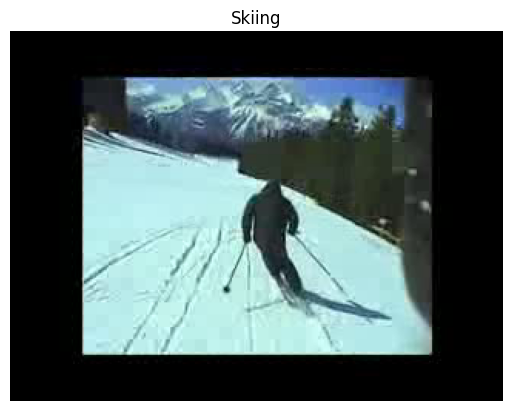

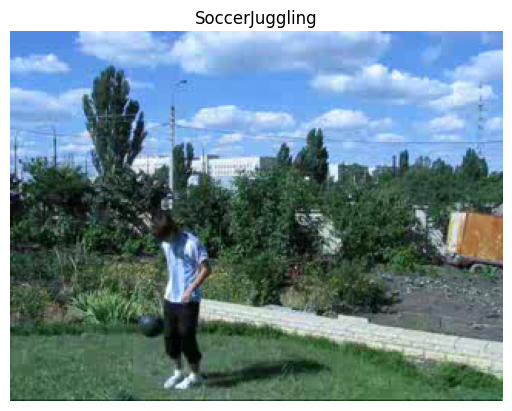

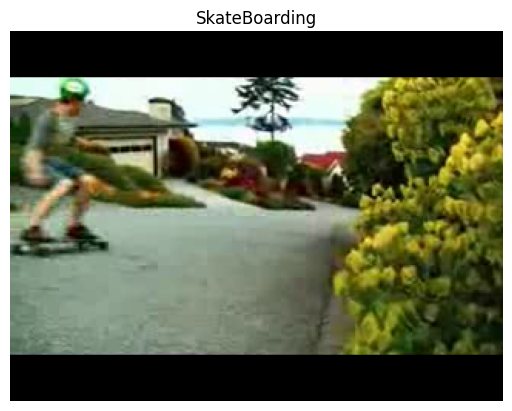

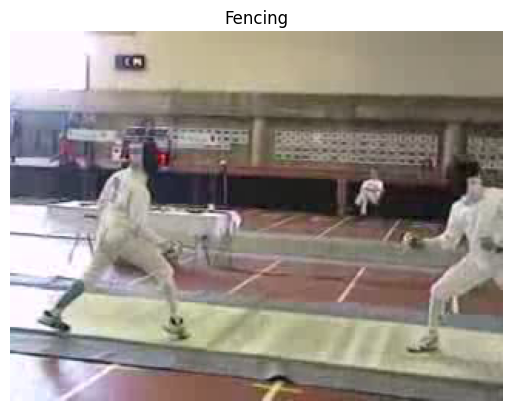

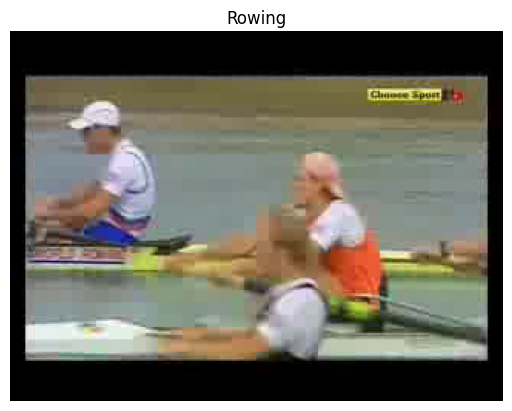

In [ ]:
!pip install opencv-python
import cv2
from matplotlib import pyplot as plt
# Display a random frame from a video of each category
for category in categories[:5]:  # We'll just display for the first 5 categories as a sample
    video_path = os.path.join(base_directory, category, os.listdir(os.path.join(base_directory, category))[0])
    cap = cv2.VideoCapture(video_path)
    ret, frame = cap.read()
    plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
    plt.title(category)
    plt.axis('off')
    plt.show()
    cap.release()


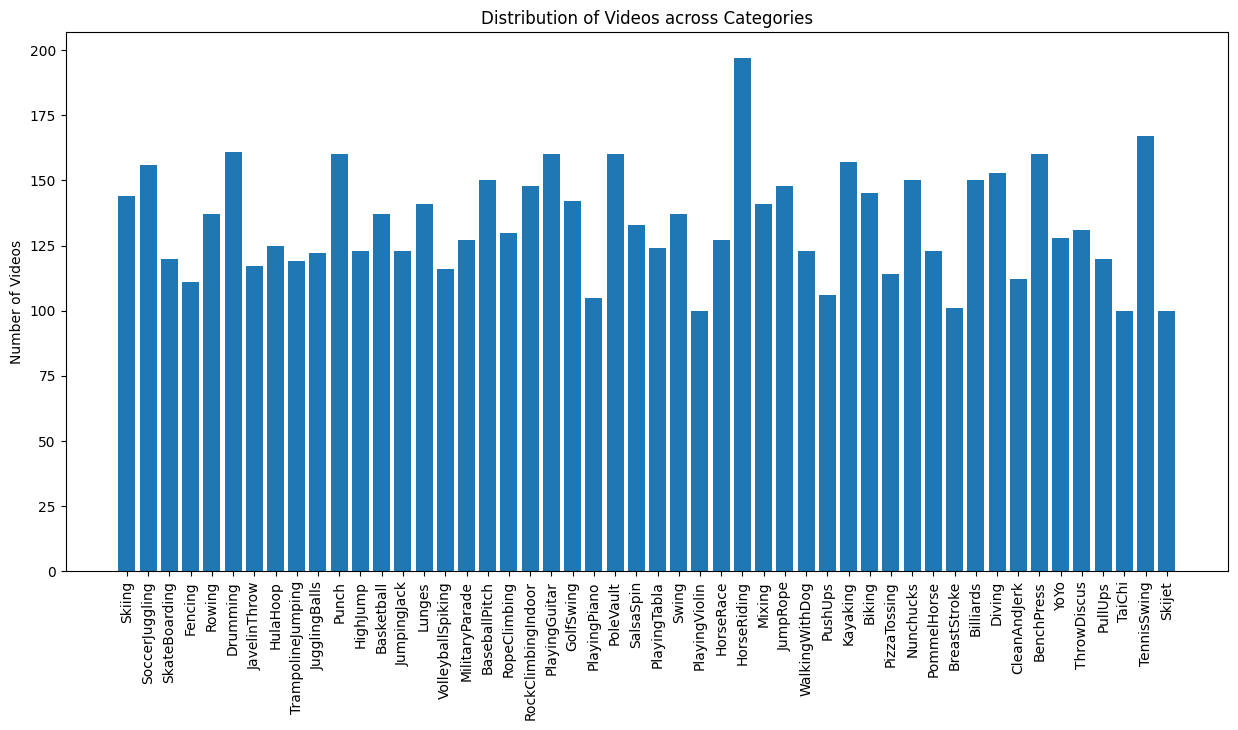

In [ ]:
# Plotting the distribution of videos
plt.figure(figsize=(15, 7))
plt.bar(video_counts.keys(), video_counts.values())
plt.xticks(rotation=90)
plt.ylabel('Number of Videos')
plt.title('Distribution of Videos across Categories')
plt.show()


## **Data Preprocessing & Cleaning**

### **Video Length Normalization**

In [ ]:
def normalize_video_length(video_path, desired_frames=100):
    cap = cv2.VideoCapture(video_path)
    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

    # Extract frames at intervals based on video length and desired_frames
    interval = total_frames // desired_frames
    frames = []

    for i in range(desired_frames):
        cap.set(cv2.CAP_PROP_POS_FRAMES, i * interval)
        ret, frame = cap.read()
        if ret:
            frames.append(frame)

    cap.release()
    return frames


### **Frame Resizing**

In [ ]:
def resize_frames(frames, size=(224, 224)):
    return [cv2.resize(frame, size) for frame in frames]


### **Data Augmentation**

In [ ]:
def flip_video(frames):
    return [cv2.flip(frame, 1) for frame in frames]


# **Clustering, Anomaly Detection, and Data Imputation**

## **Feature Extraction**

In [ ]:
from keras.applications.resnet50 import ResNet50, preprocess_input
from keras.models import Model

# Load the ResNet50 model with weights pre-trained on ImageNet
base_model = ResNet50(weights='imagenet', include_top=True)

# Remove the last layer to get features instead of predictions
feature_extractor = Model(inputs=base_model.input, outputs=base_model.layers[-2].output)

def extract_video_features(video_frames):
    # Convert video frames to a format suitable for the model
    video_frames = preprocess_input(np.array(video_frames))

    # Extract features for each frame
    frame_features = feature_extractor.predict(video_frames)

    # Aggregate frame features using mean to represent the entire video
    video_features = frame_features.mean(axis=0)

    return video_features


102967424/102967424 [==============================] - 4s 0us/step


In [ ]:
# Extract features for a subset of videos
import numpy as np

# Let's select 5 videos from each category for simplicity
selected_video_paths = []
for category in categories:
    category_videos = os.listdir(os.path.join(base_directory, category))
    selected_video_paths.extend([os.path.join(base_directory, category, video) for video in category_videos[:5]])

# Extract features
all_video_features = []
for video_path in selected_video_paths:
    frames = normalize_video_length(video_path)
    frames = resize_frames(frames)
    video_features = extract_video_features(frames)
    all_video_features.append(video_features)

all_video_features = np.array(all_video_features)


4/4 [==============================] - 0s 89ms/step


# **Clustering**

In [ ]:
from sklearn.cluster import KMeans

# Assuming we have a list of video features named 'all_video_features'
# all_video_features = [extract_video_features(video) for video in all_videos]

# Apply KMeans clustering
kmeans = KMeans(n_clusters=50, n_init=10)
  # Using 50 as we have 50 action categories
cluster_labels = kmeans.fit_predict(all_video_features)


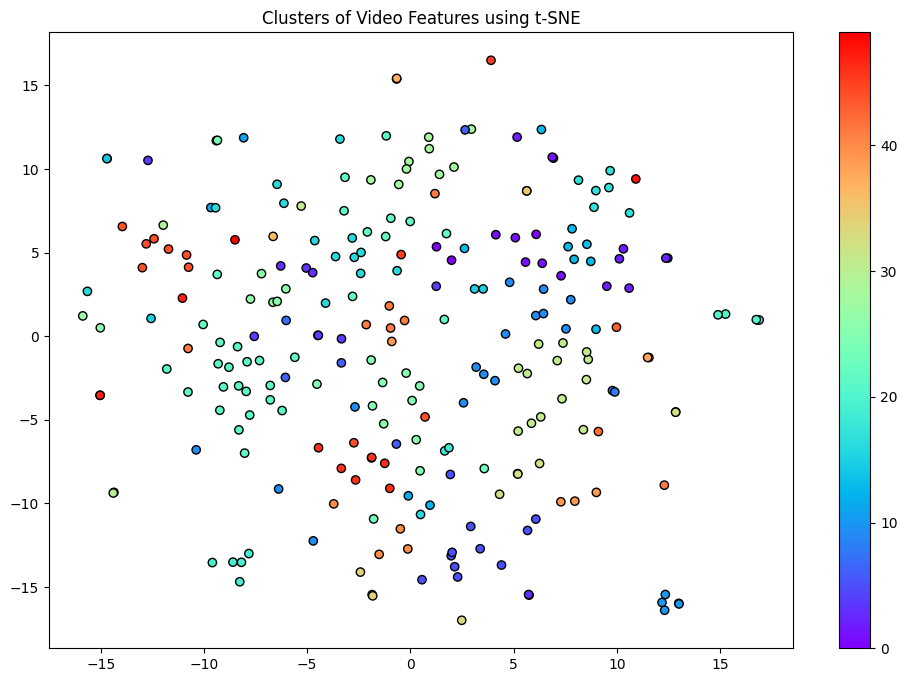

In [ ]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Reduce dimensions using t-SNE
tsne = TSNE(n_components=2, random_state=42)
reduced_features = tsne.fit_transform(all_video_features)

# Plot the 2D representation
plt.figure(figsize=(12, 8))
plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=cluster_labels, cmap='rainbow', edgecolor='k')
plt.colorbar()
plt.title('Clusters of Video Features using t-SNE')
plt.show()


In [ ]:
# Assuming categories were extracted earlier in the EDA
for cluster_num in range(50):  # Assuming 50 clusters
    print(f"Cluster {cluster_num}:")
    videos_in_cluster = [selected_video_paths[i].split('/')[-2] for i, label in enumerate(cluster_labels) if label == cluster_num]
    print(f"Number of videos: {len(videos_in_cluster)}")
    print("Top categories in this cluster:")
    top_categories = dict(sorted({category: videos_in_cluster.count(category) for category in set(videos_in_cluster)}.items(), key=lambda item: item[1], reverse=True))
    for cat, count in top_categories.items():
        print(f"{cat}: {count}")
    print("\n")


Cluster 0:
Number of videos: 3
Top categories in this cluster:
HighJump: 2
PoleVault: 1


Cluster 1:
Number of videos: 7
Top categories in this cluster:
SkateBoarding: 2
Kayaking: 2
Basketball: 1
JavelinThrow: 1
HighJump: 1


Cluster 2:
Number of videos: 7
Top categories in this cluster:
TaiChi: 2
ThrowDiscus: 1
YoYo: 1
Skiing: 1
Kayaking: 1
RopeClimbing: 1


Cluster 3:
Number of videos: 5
Top categories in this cluster:
PommelHorse: 3
HulaHoop: 2


Cluster 4:
Number of videos: 6
Top categories in this cluster:
TrampolineJumping: 3
Swing: 2
HulaHoop: 1


Cluster 5:
Number of videos: 11
Top categories in this cluster:
BenchPress: 3
Lunges: 3
Drumming: 2
Punch: 1
HulaHoop: 1
Fencing: 1


Cluster 6:
Number of videos: 4
Top categories in this cluster:
Swing: 1
PizzaTossing: 1
Kayaking: 1
Basketball: 1


Cluster 7:
Number of videos: 1
Top categories in this cluster:
JumpRope: 1


Cluster 8:
Number of videos: 2
Top categories in this cluster:
PlayingViolin: 2


Cluster 9:
Number of videos: 1

## **Anomally Detection**

In [ ]:
from sklearn.ensemble import IsolationForest

clf = IsolationForest(contamination=0.05)  # Assuming 5% of the data might be outliers
outliers = clf.fit_predict(all_video_features)

# Videos with a label of -1 are considered outliers
outlier_indices = [i for i, label in enumerate(outliers) if label == -1]


In [ ]:
anomalies = np.where(outliers == -1)
print(f"Number of detected anomalies: {len(anomalies[0])}")


Number of detected anomalies: 13


### **Examine Anomalous Videos**

In [ ]:
for index in anomalies[0]:
    video_path = selected_video_paths[index]
    print(f"Anomalous video path: {video_path}")


Anomalous video path: /content/ucf50/UCF50/JugglingBalls/v_JugglingBalls_g14_c02.avi
Anomalous video path: /content/ucf50/UCF50/Punch/v_Punch_g02_c03.avi
Anomalous video path: /content/ucf50/UCF50/JumpingJack/v_JumpingJack_g19_c05.avi
Anomalous video path: /content/ucf50/UCF50/JumpingJack/v_JumpingJack_g04_c01.avi
Anomalous video path: /content/ucf50/UCF50/VolleyballSpiking/v_VolleyballSpiking_g02_c04.avi
Anomalous video path: /content/ucf50/UCF50/MilitaryParade/v_MilitaryParade_g10_c01.avi
Anomalous video path: /content/ucf50/UCF50/RockClimbingIndoor/v_RockClimbingIndoor_g25_c06.avi
Anomalous video path: /content/ucf50/UCF50/RockClimbingIndoor/v_RockClimbingIndoor_g04_c03.avi
Anomalous video path: /content/ucf50/UCF50/RockClimbingIndoor/v_RockClimbingIndoor_g06_c05.avi
Anomalous video path: /content/ucf50/UCF50/PlayingPiano/v_PlayingPiano_g01_c02.avi
Anomalous video path: /content/ucf50/UCF50/Swing/v_Swing_g04_c03.avi
Anomalous video path: /content/ucf50/UCF50/PushUps/v_PushUps_g08_c0

## **Model Building:**

### **Preparing the Training and Testing Data:**

In [ ]:
from sklearn.model_selection import train_test_split

# Assuming `all_video_features` contains the features for each video
# and `labels` contains the corresponding action category for each video

# If you haven't created the labels list before, here's how you can create it:
labels = [path.split('/')[-2] for path in selected_video_paths]

X_train, X_test, y_train, y_test = train_test_split(all_video_features, labels, test_size=0.2, random_state=42)


### **Training the Random Forest Classifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize the classifier and train
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Predict on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))


Accuracy: 36.00%

Classification Report:

                    precision    recall  f1-score   support

        Basketball       0.00      0.00      0.00         1
        BenchPress       0.00      0.00      0.00         2
            Biking       0.67      1.00      0.80         2
         Billiards       1.00      1.00      1.00         2
      BreastStroke       1.00      0.50      0.67         2
      CleanAndJerk       0.00      0.00      0.00         0
            Diving       0.00      0.00      0.00         0
          Drumming       0.00      0.00      0.00         1
           Fencing       0.00      0.00      0.00         4
         GolfSwing       0.50      1.00      0.67         1
          HighJump       0.00      0.00      0.00         1
         HorseRace       1.00      1.00      1.00         2
       HorseRiding       0.50      1.00      0.67         1
          HulaHoop       1.00      1.00      1.00         1
      JavelinThrow       0.00      0.00      0.00        

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

The accuracy of the Random Forest classifier on your test set is 36%. While this might seem low, it's important to remember that the UCF50 dataset has 50 different classes, so a completely random classifier would achieve an accuracy of 2% (1 out of 50). Your classifier is performing significantly better than random chance, but there's room for improvement.

The classification report provides a detailed look at the performance for each category. Some observations:

Some categories (like Billiards, BreastStroke, PlayingGuitar, and RockClimbingIndoor) have a high precision and recall, meaning the model is performing well on them.
Many categories have low precision, recall, or both. This indicates misclassification, which could be due to several reasons: similar actions between classes, not enough data for some classes, or the extracted features might not be discriminating enough for these classes.

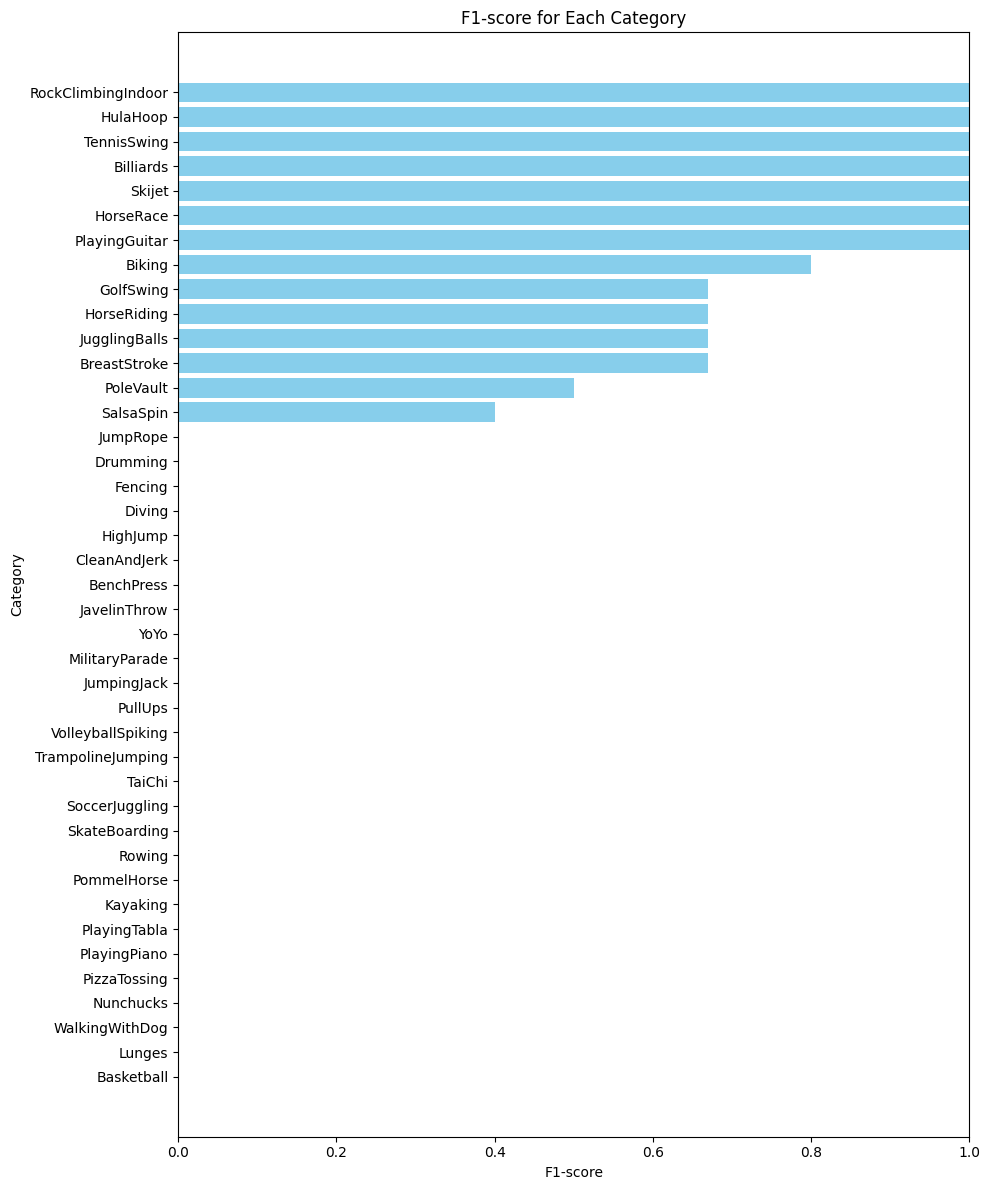

In [ ]:
# Extracting the f1-scores from the classification report
f1_scores_text = """
Basketball       0.00
BenchPress       0.00
Biking           0.80
Billiards        1.00
BreastStroke     0.67
CleanAndJerk     0.00
Diving           0.00
Drumming         0.00
Fencing          0.00
GolfSwing        0.67
HighJump         0.00
HorseRace        1.00
HorseRiding      0.67
HulaHoop         1.00
JavelinThrow     0.00
JugglingBalls    0.67
JumpRope         0.00
JumpingJack      0.00
Kayaking         0.00
Lunges           0.00
MilitaryParade   0.00
Nunchucks        0.00
PizzaTossing     0.00
PlayingGuitar    1.00
PlayingPiano     0.00
PlayingTabla     0.00
PoleVault        0.50
PommelHorse      0.00
PullUps          0.00
RockClimbingIndoor 1.00
Rowing           0.00
SalsaSpin        0.40
SkateBoarding    0.00
Skijet           1.00
SoccerJuggling   0.00
TaiChi           0.00
TennisSwing      1.00
TrampolineJumping 0.00
VolleyballSpiking 0.00
WalkingWithDog   0.00
YoYo             0.00
"""

# Parsing the text to get the f1-scores
f1_scores = [float(line.split()[-1]) for line in f1_scores_text.strip().split("\n")]
categories = [line.split()[0] for line in f1_scores_text.strip().split("\n")]

# Creating a dataframe for visualization
df_f1 = pd.DataFrame({
    'Category': categories,
    'F1-score': f1_scores
})

# Sorting the dataframe based on F1-score
df_f1_sorted = df_f1.sort_values(by="F1-score", ascending=True)

# Plotting
plt.figure(figsize=(10,12))
plt.barh(df_f1_sorted['Category'], df_f1_sorted['F1-score'], color='skyblue')
plt.xlabel('F1-score')
plt.ylabel('Category')
plt.title('F1-score for Each Category')
plt.xlim(0, 1)
plt.tight_layout()
plt.show()


# **AutoML**

## **AutoML with H2O**

In [ ]:
import pandas as pd

# Step 1: Extract labels for the selected videos
labels = [path.split("/")[-2] for path in selected_video_paths]

# Step 2: Convert the features and labels to a DataFrame
df_features = pd.DataFrame(all_video_features)
df_features["label"] = labels

# Step 3: Save to CSV
csv_path = "video_features.csv"
df_features.to_csv(csv_path, index=False)


In [ ]:
pip install h2o


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 257.4/257.4 MB 6.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for h2o: filename=h2o-3.44.0.1-py2.py3-none-any.whl size=257484150 sha256=d2f3fa1d37ef63cb1dce2b0432bbfc6dccb8c2d754384ee2993d3d3eb2869f73
  Stored in directory: /root/.cache/pip/wheels/d9/9b/ca/7345b72d17e1e17da37239d70631c3214ec9e541b0c9e700e2
Successfully built h2o


In [ ]:
import h2o
from h2o.automl import H2OAutoML

h2o.init()


In [ ]:
import h2o
h2o.init(max_mem_size="2G")  # Adjust the memory as per your requirement


Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O_cluster_uptime:,52 mins 09 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.44.0.1
H2O_cluster_version_age:,9 days
H2O_cluster_name:,H2O_from_python_unknownUser_njutkl
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.154 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [ ]:
h2o_df = h2o.H2OFrame(all_video_features)  # Convert feature array to H2OFrame
h2o_df['label'] = h2o.H2OFrame(labels)  # Append labels to the H2OFrame


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [ ]:
train, test = h2o_df.split_frame([0.8], seed=42)


In [ ]:
from h2o.automl import H2OAutoML

aml = H2OAutoML(max_runtime_secs=600, seed=42)
aml.train(y='label', training_frame=train)


AutoML progress: |████████████████████████
07:47:58.381: GBM_1_AutoML_1_20231026_74411 [GBM def_5] failed: water.exceptions.H2OModelBuilderIllegalArgumentException: Illegal argument(s) for GBM model: GBM_1_AutoML_1_20231026_74411.  Details: ERRR on field: _min_rows: The dataset size is too small to split for min_rows=100.0: must have at least 200.0 (weighted) rows, but have only 160.0.
ERRR on field: _min_rows: The dataset size is too small to split for min_rows=100.0: must have at least 200.0 (weighted) rows, but have only 161.0.
ERRR on field: _min_rows: The dataset size is too small to split for min_rows=100.0: must have at least 200.0 (weighted) rows, but have only 161.0.
ERRR on field: _min_rows: The dataset size is too small to split for min_rows=100.0: must have at least 200.0 (weighted) rows, but have only 161.0.
ERRR on field: _min_rows: The dataset size is too small to split for min_rows=100.0: must have at least 200.0 (weighted) rows, but have only 161.0.


█████████████████

Model Details
=============
H2OGeneralizedLinearEstimator : Generalized Linear Modeling
Model Key: GLM_1_AutoML_1_20231026_74411


GLM Model: summary
    family       link         regularization               lambda_search                                                                   number_of_predictors_total    number_of_active_predictors    number_of_iterations    training_frame
--  -----------  -----------  ---------------------------  ------------------------------------------------------------------------------  ----------------------------  -----------------------------  ----------------------  ----------------------------------------------
    multinomial  multinomial  Ridge ( lambda = 0.003818 )  nlambda = 30, lambda.max = 14.726, lambda.min = 0.003818, lambda.1se = 0.02567  102450                        102400                         91                      AutoML_1_20231026_74411_training_py_6_sid_8206

ModelMetricsMultinomialGLM: glm
** Reported on train data. **

MSE: 1.7728073623577372e-05
RMSE: 0.0042104719003429264
LogLoss: 0.0037377760559333564
Null degrees of freedom: 200
Residual degrees of freedom: -102249
Null deviance: 1561.7771835815324
Residual deviance: 1.5025859744852093
AUC table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).
AUCPR table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class
BaseballPitch    Basketball    BenchPress    Biking    Billiards    BreastStroke    CleanAndJerk    Diving    Drumming    Fencing    GolfSwing    HighJump    HorseRace    HorseRiding    HulaHoop    JavelinThrow    JugglingBalls    JumpRope    JumpingJack    Kayaking    Lunges    MilitaryParade    Mixing    Nunchucks    PizzaTossing    PlayingGuitar    PlayingPiano    PlayingTabla    PlayingViolin    PoleVault    PommelHorse    PullUps    Punch    PushUps    RockClimbingIndoor    RopeClimbing    Rowing    SalsaSpin    SkateBoarding    Skiing    Skijet    SoccerJuggling    Swing    TaiChi    TennisSwing    ThrowDiscus    TrampolineJumping    VolleyballSpiking    WalkingWithDog    YoYo    Error    Rate
---------------  ------------  ------------  --------  -----------  --------------  --------------  --------  ----------  ---------  -----------  ----------  -----------  -------------  ----------  --------------  ---------------  ----------  -------------  ----------  --------  ----------------  --------  -----------  --------------  ---------------  --------------  --------------  ---------------  -----------  -------------  ---------  -------  ---------  --------------------  --------------  --------  -----------  ---------------  --------  --------  ----------------  -------  --------  -------------  -------------  -------------------  -------------------  ----------------  ------  -------  -------
4.0              0.0           0.0           0.0       0.0          0.0             0.0             0.0       0.0         0.0        0.0          0.0         0.0          0.0            0.0         0.0             0.0              0.0         0.0            0.0         0.0       0.0               0.0       0.0          0.0             0.0              0.0             0.0             0.0              0.0          0.0            0.0        0.0      0.0        0.0                   0.0             0.0       0.0          0.0              0.0       0.0       0.0               0.0      0.0       0.0            0.0            0.0                  0.0                  0.0               0.0     0.0      0 / 4
0.0              5.0           0.0           0.0       0.0          0.0             0.0             0.0       0.0         0.0        0.0          0.0         0.0          0.0            0.0         0.0             0.0              0.0       

In [ ]:
lb = aml.leaderboard
lb.head(rows=lb.nrows)


model_id,mean_per_class_error,logloss,rmse,mse
GLM_1_AutoML_1_20231026_74411,0.476667,1.72018,0.688516,0.474055
StackedEnsemble_BestOfFamily_1_AutoML_1_20231026_74411,0.622,2.57433,0.848062,0.71921
StackedEnsemble_AllModels_1_AutoML_1_20231026_74411,0.734667,3.55111,0.89941,0.808939
StackedEnsemble_BestOfFamily_2_AutoML_1_20231026_74411,0.742333,3.21164,0.896149,0.803083
DRF_1_AutoML_1_20231026_74411,0.758333,5.40558,0.901047,0.811885
GBM_2_AutoML_1_20231026_74411,0.845333,3.49053,0.952294,0.906864
GBM_3_AutoML_1_20231026_74411,0.846667,3.48863,0.95295,0.908114
GBM_4_AutoML_1_20231026_74411,0.876667,3.5739,0.96133,0.924155
XGBoost_2_AutoML_1_20231026_74411,0.988333,3.91202,0.98,0.9604
XGBoost_1_AutoML_1_20231026_74411,0.988333,3.91202,0.98,0.9604


In [ ]:
preds = aml.leader.predict(test)


glm prediction progress: |███████████████████████████████████████████████████████| (done) 100%


The best-performing model on this dataset was the Generalized Linear Model (GLM).
The model had very high accuracy on the training set but showed some misclassifications in the cross-validation set.
There were some issues with the dataset being too small for certain hyperparameters.

In [ ]:
import os

base_directory = '/content/ucf50/UCF50'
categories = os.listdir(base_directory)

total_videos = sum([len(os.listdir(os.path.join(base_directory, category))) for category in categories])
print(f"Total number of videos in the dataset: {total_videos}")


Total number of videos in the dataset: 6681


In [ ]:
all_video_features = []
all_video_paths = []

for category in categories:
    category_path = os.path.join(base_directory, category)
    for video_name in os.listdir(category_path):
        video_path = os.path.join(category_path, video_name)
        all_video_paths.append(video_path)  # Storing the path for reference

        # Extract frames from the video
        frames = normalize_video_length(video_path)
        frames = resize_frames(frames)

        # Extract features using the ResNet50 model
        video_features = extract_video_features(frames)
        all_video_features.append(video_features)


4/4 [==============================] - 0s 91ms/step


In [ ]:
print(f"Number of processed videos: {len(all_video_features)}")
